In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day

In [4]:
numeric_features = ['temp','atemp','hum','windspeed']
categorical_features = ['season','month','holiday','weekday','workingday','weathersit','day']

In [5]:
bike_data[numeric_features+['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [6]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


In [7]:
bike_data.shape

(731, 15)

In [10]:
# Seperating features and target
X = bike_data[['season','mnth','holiday','weekday','workingday','weathersit'
               ,'temp','atemp','hum','windspeed']].values

y = bike_data['rentals'].values

# Splitting data into trainig set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

print(f'Trainig Set: {X_train.shape[0]}\nTest Set: {X_test.shape[0]}')

Trainig Set: 584
Test Set: 147


In [12]:
# Fitting LinearRegression Model on training set

lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr, "\n")

LinearRegression() 



In [13]:
# Evaluating the model using test data

predictions = lr.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, predictions)
print("R2 Score: ", r2)

MSE:  210673.09677936212
RMSE:  458.99139074645194
R2 Score:  0.601301673700389


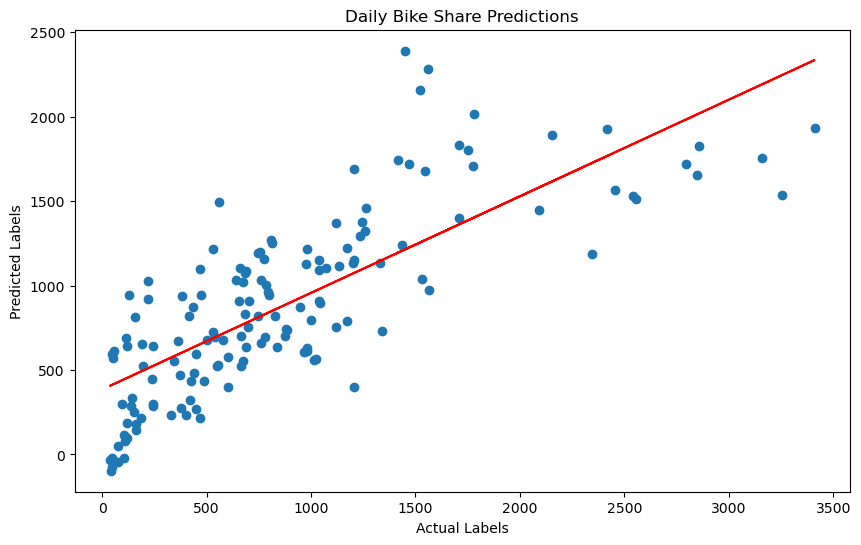

In [23]:
# Plotting predicted vs actual

plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

# Overlay the regression plot

z = np.polyfit(y_test, predictions,1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red')
plt.show()

In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print(ridge, "\n")

# Evaluating the model using test data
predictions = ridge.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, predictions)
print("R2 Score: ",r2)

Ridge() 

MSE:  206771.64751570465
RMSE:  454.72150544669057
R2 Score:  0.6086851569991234


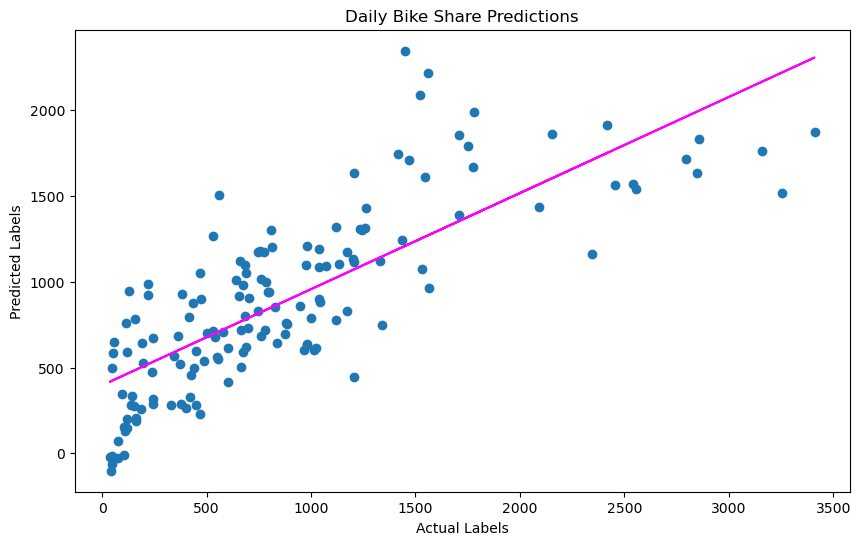

In [27]:
# Plotting predicted vs actual

plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike Share Predictions")

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print(lasso, "\n")

# Evaluating the model using test data
predictions = lasso.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("MSE: ", mse)

rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(y_test, predictions)
print("R2 Score: ",r2)

Lasso() 

MSE:  210148.31184862508
RMSE:  458.4193624277067
R2 Score:  0.6022948279130089


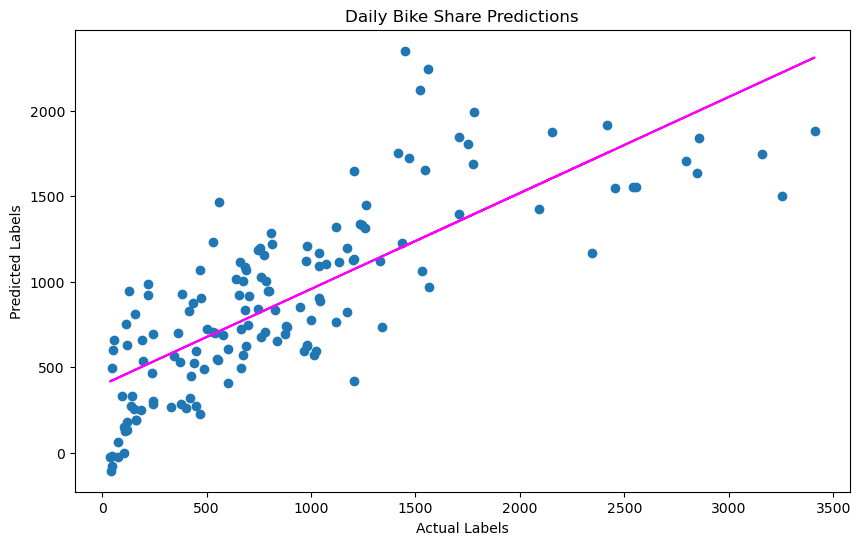

In [29]:
# Plotting predicted vs actual

plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title("Daily Bike Share Predictions")

# Overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='magenta')
plt.show()

In [30]:
# Decision Tree Algorithm

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

# Train the model
dt = DecisionTreeRegressor().fit(X_train, y_train)
print(dt, "\n")

# Visualize the model tree
tree = export_text(dt)
print(tree)

DecisionTreeRegressor() 

|--- feature_7 <= 0.42
|   |--- feature_4 <= 0.50
|   |   |--- feature_7 <= 0.32
|   |   |   |--- feature_8 <= 0.39
|   |   |   |   |--- feature_1 <= 2.00
|   |   |   |   |   |--- value: [558.00]
|   |   |   |   |--- feature_1 >  2.00
|   |   |   |   |   |--- feature_6 <= 0.28
|   |   |   |   |   |   |--- value: [981.00]
|   |   |   |   |   |--- feature_6 >  0.28
|   |   |   |   |   |   |--- value: [968.00]
|   |   |   |--- feature_8 >  0.39
|   |   |   |   |--- feature_6 <= 0.27
|   |   |   |   |   |--- feature_7 <= 0.25
|   |   |   |   |   |   |--- feature_7 <= 0.18
|   |   |   |   |   |   |   |--- feature_8 <= 0.45
|   |   |   |   |   |   |   |   |--- feature_6 <= 0.13
|   |   |   |   |   |   |   |   |   |--- feature_6 <= 0.08
|   |   |   |   |   |   |   |   |   |   |--- value: [93.00]
|   |   |   |   |   |   |   |   |   |--- feature_6 >  0.08
|   |   |   |   |   |   |   |   |   |   |--- value: [150.00]
|   |   |   |   |   |   |   |   |--- feature_6 >  0.13

MSE: 199142.91156462586
RMSE: 446.25431265661274
R2 Score: 0.6231225213421474


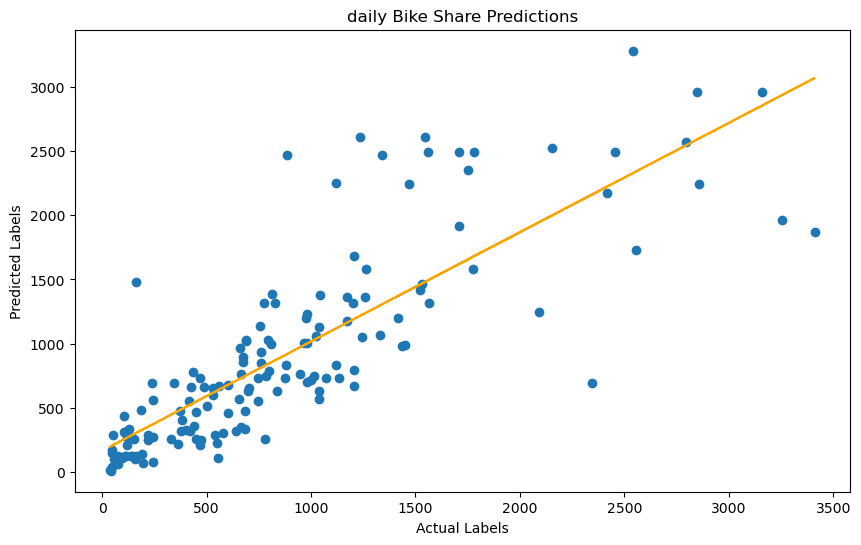

In [31]:
# Evaluating model using the  test data

predictions = dt.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}\nRMSE: {rmse}\nR2 Score: {r2}')

# Plotting predicted vs actual

plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('daily Bike Share Predictions')

# Overlay the regression line

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='orange')
plt.show()

RandomForestRegressor() 

MSE: 122020.73825578231
RMSE: 349.31466939678086
R2: 0.7690760478668337


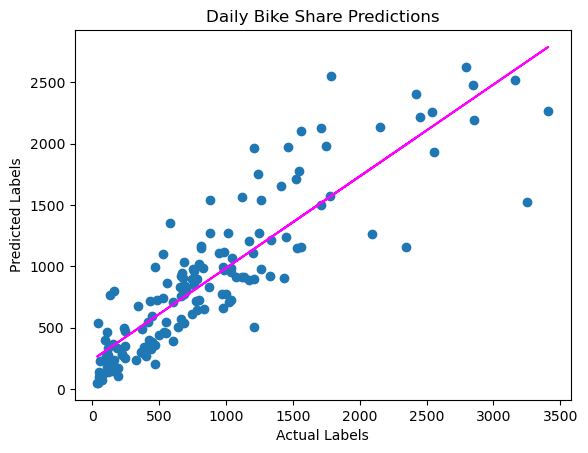

In [32]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

GradientBoostingRegressor() 

MSE: 118540.15377842546
RMSE: 344.2966072711514
R2: 0.775663045575041


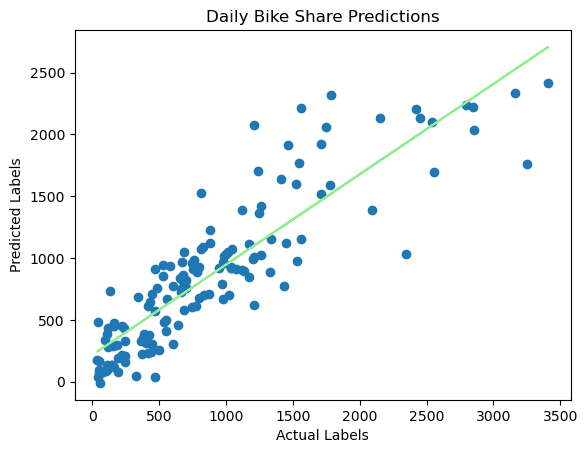

In [34]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor

# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='lightgreen')
plt.show()